## NBA Position Predictor Project

### Created 16 November 2021

## Creating a Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from get_stats import *

In [2]:
data = get_full_dataframe()

In [3]:
stats_df = data
stats_df

,RANK,NAME,TEAM,POS,AGE,GP,MPG,MIN%,USG%,TO%,...,TRB%,APG,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG,Year
3,NaN,Al Horford,Bos,C,31.00,19,35.7,74.4,17.8,0.119,...,12.8,3.3,14.9,1.00,1.16,1.68,8.5,112.7,102.7,2017
4,NaN,Alec Burks,Uta,SG,26.00,9,13.4,27.9,28.9,0.103,...,11.2,1.9,25.9,0.44,0.11,0.89,10.7,110.0,101.1,2017
5,NaN,Alex Abrines,Okc,SG,24.00,6,18.3,38.2,8.5,0.046,...,7.5,0.3,2.4,0.83,0.33,0.17,3.2,119.8,102.0,2017
6,NaN,Al-Farouq Aminu,Por,SF,27.00,4,32.7,68.2,19.7,0.102,...,15.0,1.3,6.2,1.00,0.50,1.50,7.2,126.2,112.7,2017
7,NaN,Amir Johnson,Phi,PF,30.00,8,11.7,24.4,11.9,0.115,...,13.2,1.1,13.3,0.25,0.13,0.38,7.5,122.7,100.4,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,NaN,Cody Zeller,Por,F-C,29.29,27,13.1,27.4,16.0,14.600,...,19.4,0.8,9.3,0.30,0.22,0.70,8.2,129.3,99.3,2021
1489,NaN,Ivica Zubac,Lac,C,24.84,41,24.3,50.6,14.1,15.900,...,17.1,1.2,7.3,0.49,1.05,1.24,7.3,133.5,98.6,2021
1490,NaN,Lindell Wigginton,Mil,G,23.81,1,4.6,9.6,9.3,0.000,...,11.4,0.0,0.0,1.00,0.00,0.00,0.0,200.0,98.5,2021
1491,NaN,Mamadi Diakite,Okc,F,25.00,3,9.5,19.8,10.7,14.300,...,10.7,0.0,0.0,0.33,0.33,0.33,0.0,97.2,89.9,2021


In [4]:
[(i, list(set(stats_df[stats_df['Year'] == i]['POS']))) for i in range(2017, 2022)]  # test

[(2017, ['SG', 'PF', 'PG', 'SF', 'G', 'C']),
 (2018, ['F-G', 'G-F', 'C-F', 'F-C', 'F', 'G', 'C']),
 (2019, ['F-G', 'G-F', 'C-F', 'F-C', 'F', 'G', 'C']),
 (2020, ['F-G', 'G-F', 'C-F', 'F-C', 'F', 'G', 'C']),
 (2021, ['F-G', 'G-F', 'C-F', 'F-C', 'F', 'G', 'C'])]

In [5]:
stats_df = stats_df[stats_df['Year'] != 2017].copy()
stats_df

,RANK,NAME,TEAM,POS,AGE,GP,MPG,MIN%,USG%,TO%,...,TRB%,APG,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG,Year
209,NaN,Marc Gasol,Tor,C,34.37,24,30.6,63.8,13.6,9.5,...,11.5,3.0,14.7,0.88,1.08,0.88,7.4,118.4,97.2,2018
210,NaN,Danny Green,Tor,G-F,31.98,24,28.5,59.4,12.6,13.6,...,7.0,1.1,5.4,1.29,0.46,1.08,4.2,97.4,101.6,2018
211,NaN,Serge Ibaka,Tor,F-C,29.74,24,20.8,43.4,21.4,10.6,...,15.8,0.9,7.4,0.46,0.96,1.04,7.1,105.5,91.9,2018
212,NaN,Kawhi Leonard,Tor,F,27.96,24,39.1,81.6,32.0,11.1,...,12.8,3.9,19.3,1.67,0.71,3.08,10.5,118.9,102.7,2018
213,NaN,Kyle Lowry,Tor,G,33.22,24,37.5,78.2,18.4,14.5,...,7.2,6.6,27.5,1.29,0.29,2.21,8.4,116.8,100.1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,NaN,Cody Zeller,Por,F-C,29.29,27,13.1,27.4,16.0,14.6,...,19.4,0.8,9.3,0.30,0.22,0.70,8.2,129.3,99.3,2021
1489,NaN,Ivica Zubac,Lac,C,24.84,41,24.3,50.6,14.1,15.9,...,17.1,1.2,7.3,0.49,1.05,1.24,7.3,133.5,98.6,2021
1490,NaN,Lindell Wigginton,Mil,G,23.81,1,4.6,9.6,9.3,0.0,...,11.4,0.0,0.0,1.00,0.00,0.00,0.0,200.0,98.5,2021
1491,NaN,Mamadi Diakite,Okc,F,25.00,3,9.5,19.8,10.7,14.3,...,10.7,0.0,0.0,0.33,0.33,0.33,0.0,97.2,89.9,2021


In [6]:
# replace positions to get two different player classifications:
pos_encode = {"G":0 , "F":1, "C":2, "GF":3, "FC":4}
## pos_encode = {"PG":0 , "SF":1, "C":2, "SG":3, "PF":4, "G":5 , "F":6}
pos_decode = {0:"G", 1:"F", 2:"C", 3:"GF", 4:"FC"}
## pos_decode = {0:"PG", 1:"SF", 2:"C", 3:"SG", 4:"PF"}

# - POS3 = {"G", "F", "C"}  # - POS5 = {"G", "GF", "F", "FC", "C"}
stats_df.loc[:, "POS3"] = stats_df["POS"].replace("G-F", "G").replace("F-G", "F").replace("C-F", "C").replace("F-C", "F")
## stats_df.loc[:, "POS3"] = stats_df["POS3"].replace("PG", "G").replace("SG", "G").replace("SF", "F").replace("PF", "F")
stats_df.loc[:, "POS5"] = stats_df["POS"].replace("G-F", "GF").replace("F-G", "GF").replace("C-F", "FC").replace("F-C", "FC")
## stats_df.loc[:, "POS5"] = stats_df["POS"].replace("G-F", "SG").replace("F-G", "SG").replace("C-F", "PF").replace("F-C", "PF")
## stats_df.loc[:, "POS5"] = stats_df["POS5"].replace("G", "PG").replace("F", "SF")
stats_df

,RANK,NAME,TEAM,POS,AGE,GP,MPG,MIN%,USG%,TO%,...,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG,Year,POS3,POS5
209,NaN,Marc Gasol,Tor,C,34.37,24,30.6,63.8,13.6,9.5,...,14.7,0.88,1.08,0.88,7.4,118.4,97.2,2018,C,C
210,NaN,Danny Green,Tor,G-F,31.98,24,28.5,59.4,12.6,13.6,...,5.4,1.29,0.46,1.08,4.2,97.4,101.6,2018,G,GF
211,NaN,Serge Ibaka,Tor,F-C,29.74,24,20.8,43.4,21.4,10.6,...,7.4,0.46,0.96,1.04,7.1,105.5,91.9,2018,F,FC
212,NaN,Kawhi Leonard,Tor,F,27.96,24,39.1,81.6,32.0,11.1,...,19.3,1.67,0.71,3.08,10.5,118.9,102.7,2018,F,F
213,NaN,Kyle Lowry,Tor,G,33.22,24,37.5,78.2,18.4,14.5,...,27.5,1.29,0.29,2.21,8.4,116.8,100.1,2018,G,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,NaN,Cody Zeller,Por,F-C,29.29,27,13.1,27.4,16.0,14.6,...,9.3,0.30,0.22,0.70,8.2,129.3,99.3,2021,F,FC
1489,NaN,Ivica Zubac,Lac,C,24.84,41,24.3,50.6,14.1,15.9,...,7.3,0.49,1.05,1.24,7.3,133.5,98.6,2021,C,C
1490,NaN,Lindell Wigginton,Mil,G,23.81,1,4.6,9.6,9.3,0.0,...,0.0,1.00,0.00,0.00,0.0,200.0,98.5,2021,G,G
1491,NaN,Mamadi Diakite,Okc,F,25.00,3,9.5,19.8,10.7,14.3,...,0.0,0.33,0.33,0.33,0.0,97.2,89.9,2021,F,F


In [7]:
print(stats_df.groupby('POS3')['POS3'].count())
print(stats_df.groupby('POS5')['POS5'].count())

POS3
C    138
F    449
G    543
Name: POS3, dtype: int64
POS5
C      94
F     329
FC    117
G     438
GF    152
Name: POS5, dtype: int64


In [8]:
stats_df.describe()

,RANK,AGE,GP,MPG,MIN%,USG%,TO%,FTA,FT%,2PA,...,TRB%,APG,AST%,SPG,BPG,TOPG,VI,ORTG,DRTG,Year
count,0.0,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,...,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000
mean,NaN,27.160982,16.743363,20.768584,43.258761,18.597965,11.732389,34.783186,0.680224,84.100885,...,10.087876,1.933540,12.933540,0.624796,0.398212,1.099106,6.422035,107.972301,103.542035,2020.004425
std,NaN,4.215484,13.331555,10.425826,21.722393,6.296769,6.685458,48.731908,0.279744,106.605713,...,5.106959,1.964895,10.141946,0.473366,0.437736,0.942793,2.873526,22.212913,6.340564,1.146867
min,NaN,19.070000,1.000000,4.000000,8.300000,4.400000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.900000,2018.000000
25%,NaN,23.742500,5.000000,11.400000,23.725000,14.100000,7.925000,5.000000,0.606500,12.000000,...,6.400000,0.600000,6.225000,0.270000,0.100000,0.440000,5.100000,99.500000,100.200000,2019.000000
50%,NaN,26.830000,12.000000,20.350000,42.300000,17.700000,11.300000,16.000000,0.755500,39.000000,...,9.100000,1.300000,10.200000,0.530000,0.290000,0.830000,6.500000,109.500000,104.000000,2020.000000
75%,NaN,30.055000,28.750000,29.900000,62.200000,22.375000,14.900000,43.750000,0.853500,115.000000,...,12.800000,2.600000,17.775000,0.930000,0.540000,1.500000,8.000000,118.475000,107.700000,2021.000000
max,NaN,41.610000,46.000000,41.300000,86.100000,48.100000,50.000000,400.000000,1.000000,669.000000,...,40.400000,11.800000,76.900000,2.800000,4.000000,5.170000,17.400000,280.100000,119.600000,2021.000000


In [9]:
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1130 entries, 209 to 1492
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RANK    0 non-null      float64
 1   NAME    1130 non-null   object 
 2   TEAM    1130 non-null   object 
 3   POS     1130 non-null   object 
 4   AGE     1130 non-null   float64
 5   GP      1130 non-null   int64  
 6   MPG     1130 non-null   float64
 7   MIN%    1130 non-null   float64
 8   USG%    1130 non-null   float64
 9   TO%     1130 non-null   float64
 10  FTA     1130 non-null   int64  
 11  FT%     1130 non-null   float64
 12  2PA     1130 non-null   int64  
 13  2P%     1130 non-null   float64
 14  3PA     1130 non-null   int64  
 15  3P%     1130 non-null   float64
 16  eFG%    1130 non-null   float64
 17  TS%     1130 non-null   float64
 18  PPG     1130 non-null   float64
 19  RPG     1130 non-null   float64
 20  TRB%    1130 non-null   float64
 21  APG     1130 non-null   float64
 22

### k-Nearest Neighbor Classification

In [10]:
#divide the data into the input 'X' and the labels 'y'
#selected_features = ['MIN%', 'USG%', 'TO%', 'FTA', 'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG','RPG', 'TRB%','APG', 'AST%', 'SPG', 'BPG', 'TOPG', 'VI', 'ORTG', 'DRTG']
selected_features = [i for i in list(stats_df)[4:-3]]  # if i not in ['MPG', 'PPG']]
X        = stats_df[selected_features] #the observations
y        = stats_df['POS3'] #the label

In [11]:
def kNearest(i, X_train, X_test, y_train, y_test):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    return (i, knn.score(X_test, y_test) * 100) # The accuracy of the model

def kNN_Model(X, y):
    
    # split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=6, stratify = y)
    # Enter appropriate values to partition data, and ensure results are reproducible and obtain stratified samples
    
    # feature scaling
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std, X_test_std = sc.transform(X_train), sc.transform(X_test)    
    
    # build the k-nn model, experiment with different values of k and plot the results
    accuracy_scores = [ kNearest(i, X_train_std, X_test_std, y_train, y_test) for i in range(1,30)]
    max_accuracy = max([e[1] for e in accuracy_scores])
    
    best = [t for t in accuracy_scores if t[1] == max_accuracy]
    best = min([x[0] for x in best])
    acc = pd.DataFrame({'k': [e[0] for e in accuracy_scores], 'accuracy': [e[1] for e in accuracy_scores]})
    lines = acc.plot.line(x = 'k')
    
    #print(list(zip(k, accuracy)))
    print(f'The Optimal value for k is {best}')
    
    knn = KNeighborsClassifier(n_neighbors=best) 
    knn.fit(X_train_std, y_train)
    y_pred=knn.predict(X_test_std)
    print(classification_report(y_test, y_pred))

The Optimal value for k is 17
              precision    recall  f1-score   support

           C       0.88      0.37      0.52        41
           F       0.62      0.67      0.65       135
           G       0.76      0.82      0.79       163

    accuracy                           0.71       339
   macro avg       0.76      0.62      0.65       339
weighted avg       0.72      0.71      0.70       339



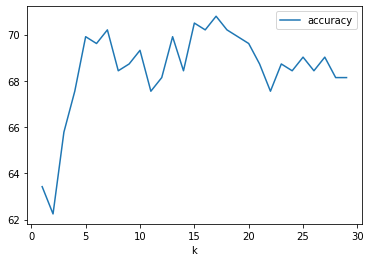

In [12]:
kNN_Model(X, stats_df['POS3'])

The Optimal value for k is 24
              precision    recall  f1-score   support

           C       0.54      0.46      0.50        28
           F       0.47      0.54      0.50        99
          FC       0.45      0.14      0.22        35
           G       0.67      0.89      0.76       131
          GF       0.24      0.09      0.13        46

    accuracy                           0.56       339
   macro avg       0.47      0.42      0.42       339
weighted avg       0.52      0.56      0.52       339



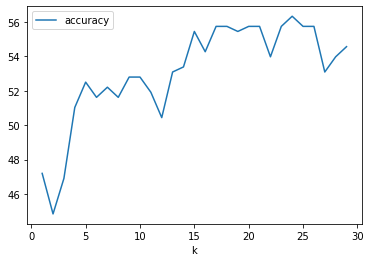

In [13]:
kNN_Model(X, stats_df['POS5'])

### Support Vector Machine

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [15]:
#divide the data into the input 'X' and the labels 'y'
#selected_features = ['MIN%', 'USG%', 'TO%', 'FTA', 'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG',
#                     'RPG', 'TRB%','APG', 'AST%', 'SPG', 'BPG', 'TOPG', 'VI', 'ORTG', 'DRTG']
selected_features = [i for i in list(stats_df)[4:-3]]  # if i not in ['MPG', 'PPG']]
X        = stats_df[selected_features] #the observations
y        = stats_df['POS3'] #the label

In [16]:
def SupportVector(X, y, target_names):
    # split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=6, stratify = y)
    # Enter appropriate values to partition data, and ensure results are reproducible and obtain stratified samples


    # feature scaling
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std, X_test_std = sc.transform(X_train), sc.transform(X_test)    
    
    # initialize the classifier
    svm = SVC() #the default kernel is rbf
    svm.fit(X_train_std, y_train) #fit the data
    
    # predict the labels for the test set
    y_pred   = svm.predict(X_test_std)
    # print('The prediction is: {}'.format(y_pred))
    
    #evaluate the prediction accuracy
    print('The accuracy of the model is: {}'.format(svm.score(X_test_std, y_test)))

    #get the classification report
    print(classification_report(y_test, y_pred, target_names = target_names))

In [17]:
SupportVector(X, stats_df['POS3'], target_names = ['C', 'F', 'G'])
# SupportVector(X, stats_df['POS5'], target_names = ['C', 'F', 'FC', "G", "GF"])

The accuracy of the model is: 0.6873156342182891
              precision    recall  f1-score   support

           C       0.64      0.39      0.48        41
           F       0.60      0.64      0.62       135
           G       0.77      0.80      0.78       163

    accuracy                           0.69       339
   macro avg       0.67      0.61      0.63       339
weighted avg       0.69      0.69      0.68       339



### Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [19]:
stats_df.loc[:, "POS3"] = stats_df["POS3"].apply(lambda x: pos_encode[x])
stats_df.loc[:, "POS5"] = stats_df["POS5"].apply(lambda x: pos_encode[x])

In [20]:
#divide the data into the input 'X' and the labels 'y'
#selected_features = ['MIN%', 'USG%', 'TO%', 'FTA', 'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG',
#                     'RPG', 'TRB%','APG', 'AST%', 'SPG', 'BPG', 'TOPG', 'VI', 'ORTG', 'DRTG']
selected_features = [i for i in list(stats_df)[4:-3]]  # if i not in ['MPG', 'PPG']]
X        = stats_df[selected_features] #the observations
y        = stats_df['POS3'] #the label

In [21]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=6, stratify = y)
# Enter appropriate values to partition data, and ensure results are reproducible and obtain stratified samples


# feature scaling
sc = StandardScaler()
sc.fit(X_train)
X_train_std, X_test_std = sc.transform(X_train), sc.transform(X_test)    


In [22]:
rf = RandomForestRegressor(n_estimators=10, random_state=7)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=7)

In [23]:
#predict the labels for the test set
y_pred   = rf.predict(X_test)
# print('The prediction is: {}'.format(y_pred))

# Evaluate the Predictions
mse = mean_squared_error(y_test, y_pred)
print('The mse of the model is: {}'.format(mse))

The mse of the model is: 0.2522418879056047


In [24]:
n = max(rf.feature_importances_)
param = selected_features[list(rf.feature_importances_).index(n)]
print(f"The most important parameter was '{param}'.")

The most important parameter was 'TRB%'.


In [25]:
# sorted([(n, selected_features[list(rf.feature_importances_).index(n)]) for n in rf.feature_importances_], key = lambda x: x[0])

### Misc...

In [26]:
stats_df['POS'].isin(["F", "G"])

209     False
210     False
211     False
212      True
213      True
        ...  
1488    False
1489    False
1490     True
1491     True
1492     True
Name: POS, Length: 1130, dtype: bool